In [20]:
import pandas as pd
import numpy as np

#for plotting 
import matplotlib.pyplot as plt

#model
from sklearn.linear_model import Lasso

#metrices
from sklearn.metrics import mean_squared_error,r2_score


#to visalize all the cols
pd.pandas.set_option('display.max_columns', None)

In [2]:
X_train = pd.read_csv('xtrain.csv')
X_test = pd.read_csv('xtest.csv')

X_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
0,931,0.000000,0.75,0.461171,0.377048,1.0,1.0,0.333333,1.000000,1.0,0.0,0.0,0.863636,0.4,1.0,0.75,0.6,0.777778,0.50,0.014706,0.049180,0.0,0.0,1.0,1.0,0.000000,0.00000,0.666667,1.0,1.0,0.75,0.75,0.75,1.000000,0.002835,0.666667,0.0,0.673479,0.239935,1.0,1.00,1.0,1.0,0.559760,0.0,0.0,0.523250,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.000000,0.2,0.8,0.018692,1.000000,0.75,0.430183,0.666667,1.0,1.0,0.116686,0.032907,0.0,0.000000,0.0,0.0,0.0,0.75,1.0,0.0,0.545455,0.75,0.666667,0.75,12.211060,0.0,0.0,0.0
1,657,0.000000,0.75,0.456066,0.399443,1.0,1.0,0.333333,0.333333,1.0,0.0,0.0,0.363636,0.4,1.0,0.75,0.6,0.444444,0.75,0.360294,0.049180,0.0,0.0,0.6,0.6,0.666667,0.03375,0.666667,1.0,0.5,0.50,0.75,0.25,0.666667,0.142807,0.666667,0.0,0.114724,0.172340,1.0,1.00,1.0,1.0,0.434539,0.0,0.0,0.406196,0.333333,0.0,0.333333,0.5,0.375,0.333333,0.666667,0.250000,1.0,0.000000,0.2,0.8,0.457944,0.666667,0.25,0.220028,0.666667,1.0,1.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.50,1.0,0.0,0.636364,0.50,0.666667,0.75,11.887931,0.0,0.0,0.0
2,46,0.588235,0.75,0.394699,0.347082,1.0,1.0,0.000000,0.333333,1.0,0.0,0.0,0.954545,0.4,1.0,1.00,0.6,0.888889,0.50,0.036765,0.098361,1.0,0.0,0.3,0.2,0.666667,0.25750,1.000000,1.0,1.0,1.00,0.75,0.25,1.000000,0.080794,0.666667,0.0,0.601951,0.286743,1.0,1.00,1.0,1.0,0.627205,0.0,0.0,0.586296,0.333333,0.0,0.666667,0.0,0.250,0.333333,1.000000,0.333333,1.0,0.333333,0.8,0.8,0.046729,0.666667,0.50,0.406206,0.666667,1.0,1.0,0.228705,0.149909,0.0,0.000000,0.0,0.0,0.0,0.75,1.0,0.0,0.090909,1.00,0.666667,0.75,12.675764,0.0,0.0,0.0
3,1349,0.000000,0.75,0.388581,0.493677,1.0,1.0,0.666667,0.666667,1.0,0.0,0.0,0.454545,0.4,1.0,0.75,0.6,0.666667,0.50,0.066176,0.163934,0.0,0.0,1.0,1.0,0.000000,0.00000,0.666667,1.0,1.0,0.75,0.75,1.00,1.000000,0.255670,0.666667,0.0,0.018114,0.242553,1.0,1.00,1.0,1.0,0.566920,0.0,0.0,0.529943,0.333333,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.250000,1.0,0.333333,0.4,0.8,0.084112,0.666667,0.50,0.362482,0.666667,1.0,1.0,0.469078,0.045704,0.0,0.000000,0.0,0.0,0.0,0.75,1.0,0.0,0.636364,0.25,0.666667,0.75,12.278393,1.0,0.0,0.0
4,56,0.000000,0.75,0.577658,0.402702,1.0,1.0,0.333333,0.333333,1.0,0.0,0.0,0.363636,0.4,1.0,0.75,0.6,0.555556,0.50,0.323529,0.737705,0.0,0.0,0.6,0.7,0.666667,0.17000,0.333333,1.0,0.5,0.50,0.75,0.25,0.333333,0.086818,0.666667,0.0,0.434278,0.233224,1.0,0.75,1.0,1.0,0.549026,0.0,0.0,0.513216,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.333333,0.416667,1.0,0.333333,0.8,0.8,0.411215,0.666667,0.50,0.406206,0.666667,1.0,1.0,0.000000,0.000000,0.0,0.801181,0.0,0.0,0.0,0.75,1.0,0.0,0.545455,0.50,0.666667,0.75,12.103486,0.0,0.0,0.0


In [3]:
y_train = X_train['SalePrice']
y_test = X_test['SalePrice']

In [11]:
selected_features = pd.read_csv('selected_features.csv')


In [12]:
features = selected_features.iloc[:,0].to_list()
features += ['LotFrontage'] 

In [14]:
len(features)

22

In [15]:
#select the features
X_train = X_train[features]
X_test = X_test[features]
print(X_train.shape,X_test.shape)

(1314, 22) (146, 22)


In [17]:
lin_model = Lasso(alpha = 0.005,random_state=0)

lin_model.fit(X_train,y_train)

Lasso(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=0,
      selection='cyclic', tol=0.0001, warm_start=False)

In [25]:
pred = lin_model.predict(X_test)
train_pred = lin_model.predict(X_train)
#since we transformed the labels into log, so to calculate errir,we will use exp on it

print('train mean squared error is {}'.format(mean_squared_error(y_true = np.exp(y_train),y_pred = np.exp(train_pred))))
print('train r_2 score is {}\n\n'.format(r2_score(y_true=np.exp(y_train),y_pred = np.exp(train_pred) )))

print('test mean squared error is {}'.format(mean_squared_error(y_true = np.exp(y_test),y_pred = np.exp(pred))))
print('test r_2 score is {}'.format(r2_score(y_true=np.exp(y_test),y_pred = np.exp(pred) )))

train mean squared error is 1095464701.1792243
train r_2 score is 0.8245524987165784


test mean squared error is 1415749527.826108
test r_2 score is 0.7939863537248242


Text(0, 0.5, 'Predictions')

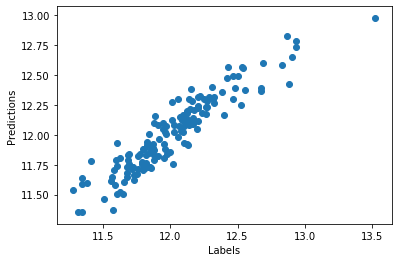

In [28]:
plt.scatter(y_test,pred)
plt.xlabel('Labels')
plt.ylabel('Predictions')
#ideal graph is along the 45 degree line passing through origin(x=y)

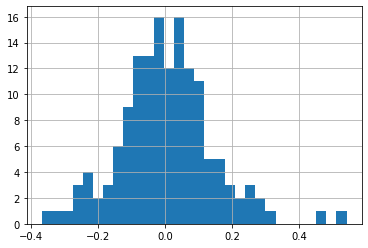

In [30]:
#error should be normally distributed
error = y_test - pred
error.hist(bins = 30)